In [27]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [28]:
# make sure pandas is version 1.0 or higher
# make sure networkx is verion 2.4 or higher
print(pd.__version__)
print(nx.__version__)

2.0.1
3.1


In [30]:
experiments = pd.read_csv('data/output_data/experiments_2000s_0p.csv')
outcomes = pd.read_csv('data/output_data/outcomes_2000s_0p.csv')

experiments = experiments.drop(columns='Unnamed: 0')
outcomes = outcomes.drop(columns='Unnamed: 0')
experiments

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
0,128,271.675341,10.0,0.379164,165.781286,10.0,0.039913,145.845003,10.0,0.145768,...,0,0,0,0,0,0,0,0,policy 0,dikesnet
1,58,304.179294,10.0,0.205331,240.329032,1.5,0.657808,298.958385,10.0,0.793443,...,0,0,0,0,0,0,0,1,policy 0,dikesnet
2,123,107.462785,1.5,0.526203,192.748450,10.0,0.930140,250.486387,1.5,0.215615,...,0,0,0,0,0,0,0,2,policy 0,dikesnet
3,51,38.079313,10.0,0.722308,349.084823,1.0,0.442463,324.991697,10.0,0.129341,...,0,0,0,0,0,0,0,3,policy 0,dikesnet
4,86,195.600047,10.0,0.394168,278.267534,1.5,0.887804,168.085919,1.0,0.970170,...,0,0,0,0,0,0,0,4,policy 0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,42,280.652180,10.0,0.337516,242.661308,1.0,0.047813,228.625525,10.0,0.183375,...,0,0,0,0,0,0,0,1995,policy 0,dikesnet
1996,12,241.382778,1.0,0.048535,163.087103,10.0,0.275943,147.999836,1.0,0.807344,...,0,0,0,0,0,0,0,1996,policy 0,dikesnet
1997,31,137.321483,1.5,0.683471,192.368665,10.0,0.160505,148.439730,10.0,0.802084,...,0,0,0,0,0,0,0,1997,policy 0,dikesnet
1998,51,99.973268,1.0,0.719086,121.391228,10.0,0.278877,272.981599,10.0,0.156535,...,0,0,0,0,0,0,0,1998,policy 0,dikesnet


In [31]:
outcomes

,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths,policy
0,3.147613e+09,0,0.0,0.0,2.672203,policy 0
1,2.270690e+09,0,0.0,0.0,1.513738,policy 0
2,1.859947e+09,0,0.0,0.0,2.761947,policy 0
3,1.562664e+09,0,0.0,0.0,2.707094,policy 0
4,1.158286e+09,0,0.0,0.0,0.771974,policy 0
...,...,...,...,...,...,...
1995,3.682907e+09,0,0.0,0.0,2.875489,policy 0
1996,2.158885e+09,0,0.0,0.0,1.514560,policy 0
1997,5.704659e+08,0,0.0,0.0,0.526372,policy 0
1998,1.379375e+09,0,0.0,0.0,2.587505,policy 0


# Multiscatter plot

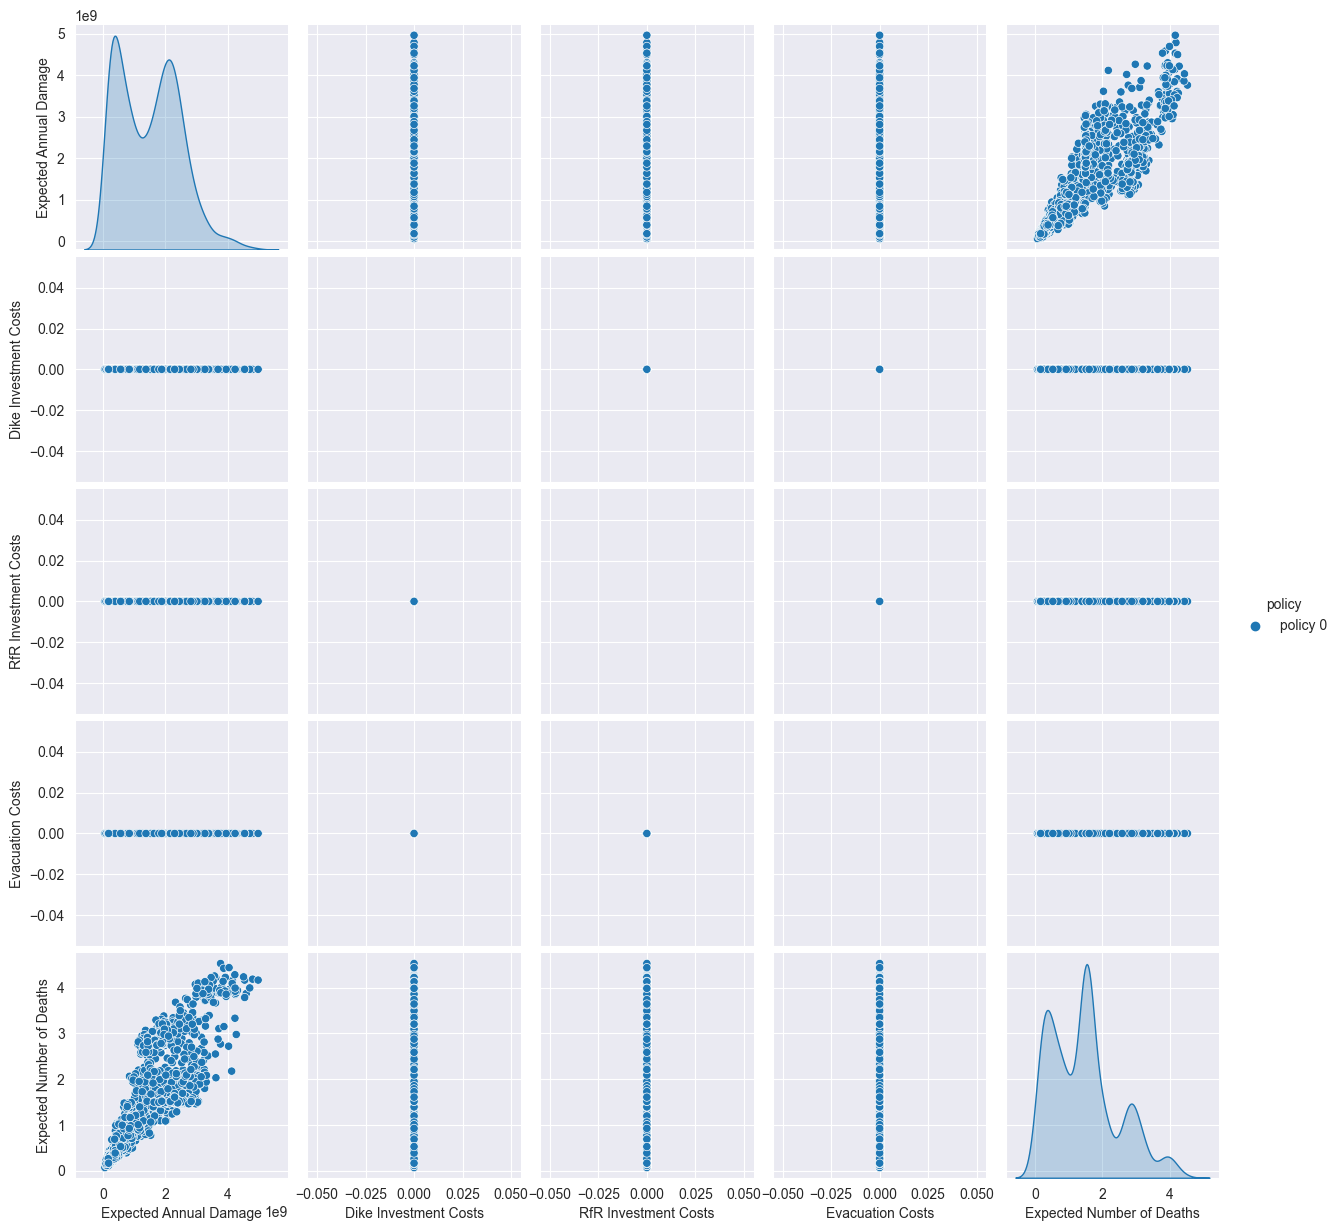

In [32]:
sns.pairplot(outcomes, hue='policy')
plt.show()

# Feature scoring

In [34]:
list_of_uncertainties = ['discount rate 0','discount rate 1','discount rate 2',\
'A.0_ID flood wave shape',
'A.1_Bmax','A.1_pfail','A.1_Brate',\
'A.2_Bmax','A.2_pfail','A.2_Brate',\
'A.3_Bmax','A.3_pfail','A.3_Brate',\
'A.4_Bmax','A.4_pfail','A.4_Brate',\
'A.5_Bmax','A.5_pfail','A.5_Brate',]

uncertainty_experiments = experiments.loc[:,list_of_uncertainties]
uncertainty_experiments

,discount rate 0,discount rate 1,discount rate 2,A.0_ID flood wave shape,A.1_Bmax,A.1_pfail,A.1_Brate,A.2_Bmax,A.2_pfail,A.2_Brate,A.3_Bmax,A.3_pfail,A.3_Brate,A.4_Bmax,A.4_pfail,A.4_Brate,A.5_Bmax,A.5_pfail,A.5_Brate
0,1.5,2.5,3.5,128,271.675341,0.379164,10.0,165.781286,0.039913,10.0,145.845003,0.145768,10.0,116.565842,0.813574,1.5,76.049717,0.676102,1.0
1,1.5,3.5,3.5,58,304.179294,0.205331,10.0,240.329032,0.657808,1.5,298.958385,0.793443,10.0,134.484768,0.898227,10.0,241.458357,0.999215,10.0
2,4.5,2.5,1.5,123,107.462785,0.526203,1.5,192.748450,0.930140,10.0,250.486387,0.215615,1.5,345.968051,0.061730,1.5,185.506795,0.207267,1.0
3,1.5,3.5,4.5,51,38.079313,0.722308,10.0,349.084823,0.442463,1.0,324.991697,0.129341,10.0,87.349859,0.699357,1.0,197.029073,0.427734,1.0
4,2.5,1.5,4.5,86,195.600047,0.394168,10.0,278.267534,0.887804,1.5,168.085919,0.970170,1.0,219.591434,0.799847,10.0,67.263511,0.674264,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2.5,1.5,3.5,42,280.652180,0.337516,10.0,242.661308,0.047813,1.0,228.625525,0.183375,10.0,42.045140,0.267862,10.0,250.098639,0.141406,10.0
1996,4.5,3.5,1.5,12,241.382778,0.048535,1.0,163.087103,0.275943,10.0,147.999836,0.807344,1.0,276.381562,0.444401,10.0,255.497760,0.980682,1.0
1997,1.5,3.5,4.5,31,137.321483,0.683471,1.5,192.368665,0.160505,10.0,148.439730,0.802084,10.0,58.119069,0.672999,10.0,64.017011,0.897126,1.0
1998,4.5,2.5,3.5,51,99.973268,0.719086,1.0,121.391228,0.278877,10.0,272.981599,0.156535,10.0,94.301047,0.245501,10.0,148.199728,0.192945,10.0


PRIM